# Analisi delle performance
## Passo 1: Generare dati
Automatizziamo la generazione di dati con il seguente blocco di codice che ci consente di ottenere informazioni sulle performance dell'algoritmo.
Possiamo modificare le variabili di N_PROCESSORI, N_START_INPUT, STRATEGIA, OFFSET e N_CICLI per ottenere set di informazioni diversi.

In [4]:
import subprocess

N_PROCESSORI = 4
N_START_INPUT = 2000
STRATEGIA = 3
OFFSET = 1000
N_CICLI = 5

for i in range(N_CICLI):
    comando = ["mpirun", "-n", str(N_PROCESSORI), "./pdc1", str(STRATEGIA), str(N_START_INPUT)]
    try:
        subprocess.run(comando, text=True, capture_output=True, check=True)
    except subprocess.CalledProcessError as e:
        exit(1)
    N_START_INPUT += OFFSET


## Passo 2: Analizzare le informazioni estratte
Il seguente script si occupa della lettura del file CSV per estrarre i dati di nostro interesse e costruire i grafici

IndexError: single positional indexer is out-of-bounds

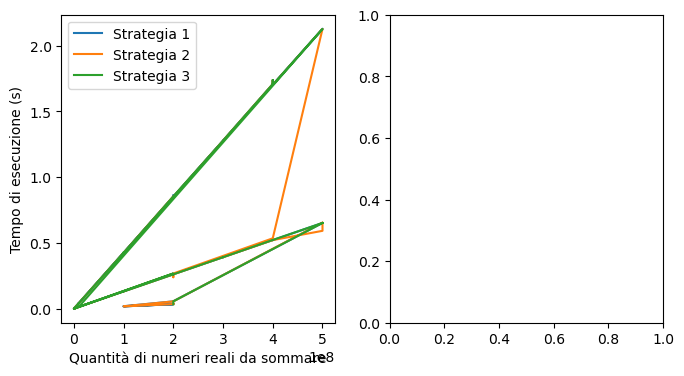

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi il file CSV
data = pd.read_csv('output_sorted.csv')

strategy1_data = data[data.iloc[:, 2] == 1]  # Terza colonna (numero della strategia)
strategy2_data = data[data.iloc[:, 2] == 2]
strategy3_data = data[data.iloc[:, 2] == 3]

# Crea i grafici per la quarta colonna (tempo di esecuzione)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(strategy1_data.iloc[:, 1], strategy1_data.iloc[:, 3], label='Strategia 1')  # Seconda colonna (tempo di esecuzione)
plt.plot(strategy2_data.iloc[:, 1], strategy2_data.iloc[:, 3], label='Strategia 2')
plt.plot(strategy3_data.iloc[:, 1], strategy3_data.iloc[:, 3], label='Strategia 3')
plt.xlabel('Quantità di numeri reali da sommare')
plt.ylabel('Tempo di esecuzione (s)')
plt.legend()


# Crea i grafici per la quinta colonna (speed up)
plt.subplot(132)
plt.plot(strategy1_data.iloc[:, 1], strategy1_data.iloc[:, 4], label='Strategia 1')  # Seconda colonna (speed up)
plt.plot(strategy2_data.iloc[:, 1], strategy2_data.iloc[:, 4], label='Strategia 2')
plt.plot(strategy3_data.iloc[:, 1], strategy3_data.iloc[:, 4], label='Strategia 3')
plt.xlabel('Quantità di numeri reali da sommare')
plt.ylabel('Speed Up')
plt.legend()

# Crea i grafici per la sesta colonna (speed up normalizzato)
plt.subplot(133)
plt.plot(strategy1_data.iloc[:, 1], strategy1_data.iloc[:, 5], label='Strategia 1')  # Seconda colonna (speed up normalizzato)
plt.plot(strategy2_data.iloc[:, 1], strategy2_data.iloc[:, 5], label='Strategia 2')
plt.plot(strategy3_data.iloc[:, 1], strategy3_data.iloc[:, 5], label='Strategia 3')
plt.xlabel('Quantità di numeri reali da sommare')
plt.ylabel('Efficienza')
plt.legend()

plt.tight_layout()
plt.show()



#Grafico a Dispersione di SPEEDUP vs NINPUT per ciascuna Strategia

# Carica i dati in un DataFrame
df = pd.read_csv('tuo_file.csv')

# Creazione del grafico a dispersione
plt.figure(figsize=(10, 6))

strategie = df['STRATEGIA'].unique()

for strategia in strategie:
    sub_group = df[df['STRATEGIA'] == strategia]
    plt.scatter(sub_group['NINPUT'], sub_group['SPEEDUP'], label=f'Strategia {strategia}', alpha=0.7)

plt.xlabel('NINPUT')
plt.ylabel('SPEEDUP')
plt.title('Scatter Plot di SPEEDUP vs NINPUT per ciascuna Strategia')
plt.legend()
plt.show()







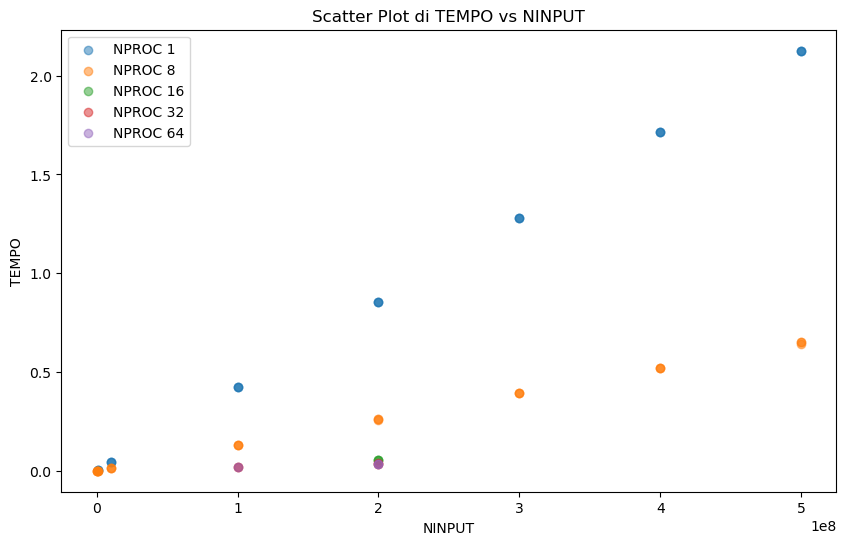

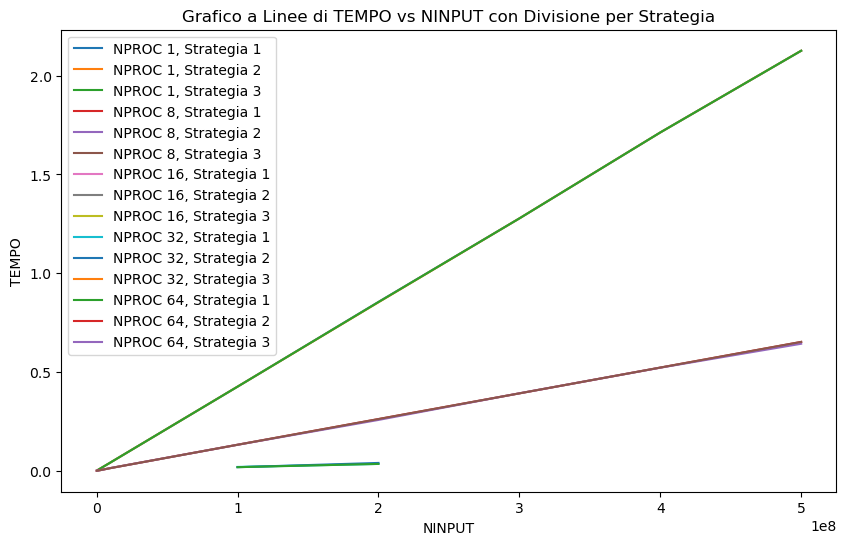

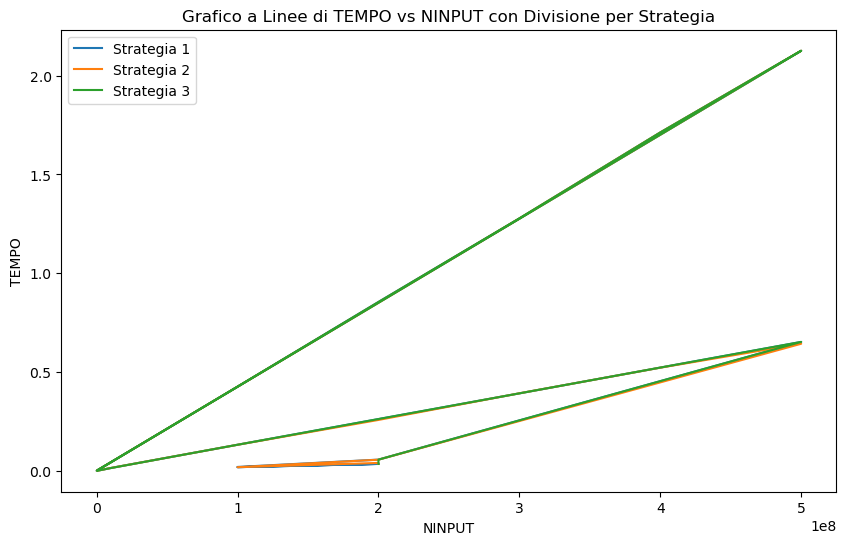

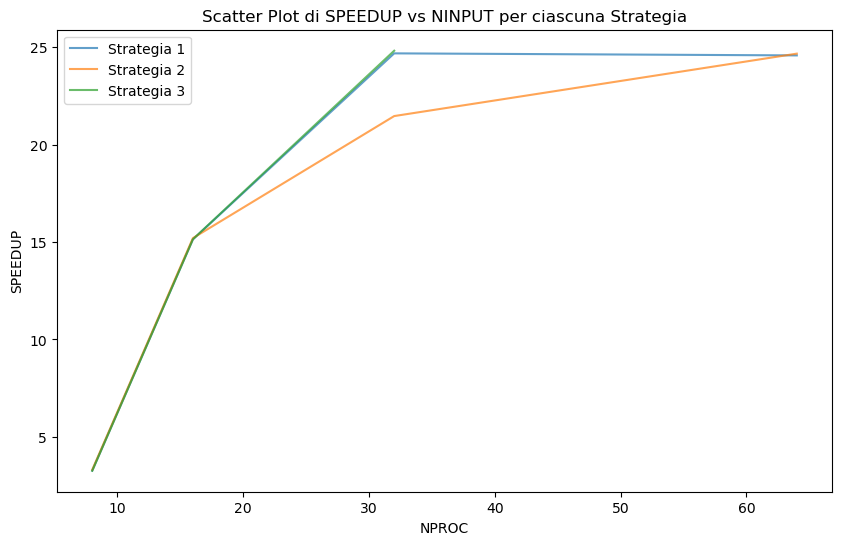

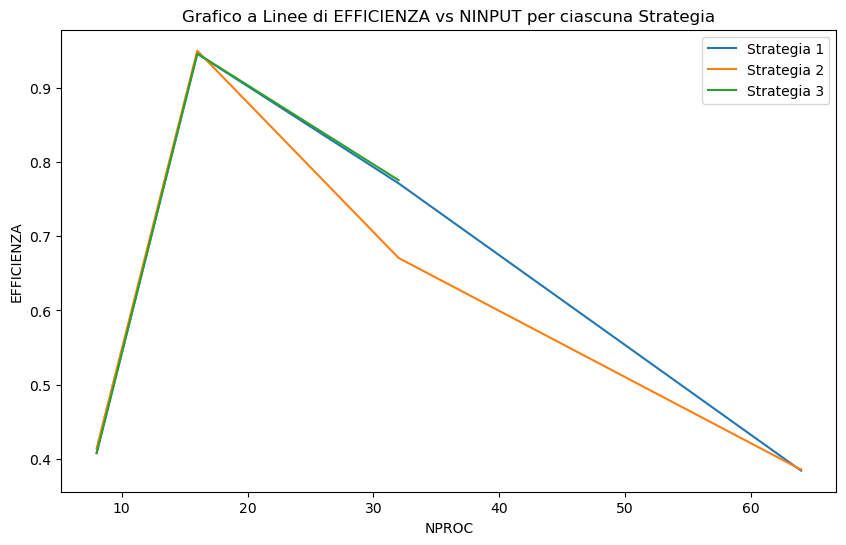

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carica il CSV in un DataFrame
df = pd.read_csv('dati_medi.csv')

# Filtra i dati per NPROC desiderato (1 o 8)
df = df[df['NPROC'].isin([1, 8,16,32,64])]

# Creazione del grafico a dispersione
plt.figure(figsize=(10, 6))
for nproc, group in df.groupby('NPROC'):
    plt.scatter(group['NINPUT'], group['TEMPO'], label=f'NPROC {nproc}', alpha=0.5)

plt.xlabel('NINPUT')
plt.ylabel('TEMPO')
plt.title('Scatter Plot di TEMPO vs NINPUT')
plt.legend()
plt.show()

# Filtra i dati per NPROC desiderato (1 o 8)
df = df[df['NPROC'].isin([1, 8,16,32,64])]
# Creazione del grafico a linee con divisione per strategia
plt.figure(figsize=(10, 6))

strategie = df['STRATEGIA'].unique()

for nproc, group in df.groupby('NPROC'):
    for strategia in strategie:
        sub_group = group[group['STRATEGIA'] == strategia]
        plt.plot(sub_group['NINPUT'], sub_group['TEMPO'], label=f'NPROC {nproc}, Strategia {strategia}')

plt.xlabel('NINPUT')
plt.ylabel('TEMPO')
plt.title('Grafico a Linee di TEMPO vs NINPUT con Divisione per Strategia')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))

strategie = df['STRATEGIA'].unique()

for strategia in strategie:
    sub_group = df[df['STRATEGIA'] == strategia]
    plt.plot(sub_group['NINPUT'], sub_group['TEMPO'], label=f'Strategia {strategia}')

plt.xlabel('NINPUT')
plt.ylabel('TEMPO')
plt.title('Grafico a Linee di TEMPO vs NINPUT con Divisione per Strategia')
plt.legend()
plt.show()

########### SPEEDUP EFFICIENZA ###########

#Grafico a Dispersione di SPEEDUP vs NINPUT per ciascuna Strategia

# Carica i dati in un DataFrame
df = pd.read_csv('su_eff.csv')

# Creazione del grafico a dispersione
plt.figure(figsize=(10, 6))

strategie = df['STRATEGIA'].unique()

for strategia in strategie:
    sub_group = df[df['STRATEGIA'] == strategia]
    plt.plot(sub_group['NPROC'], sub_group['SPEEDUP'], label=f'Strategia {strategia}', alpha=0.7)

plt.xlabel('NPROC')
plt.ylabel('SPEEDUP')
plt.title('Scatter Plot di SPEEDUP vs NINPUT per ciascuna Strategia')
plt.legend()
plt.show()


#Grafico a Linee di EFFICIENZA vs NINPUT per ciascuna Strategia
plt.figure(figsize=(10, 6))

for strategia in strategie:
    sub_group = df[df['STRATEGIA'] == strategia]
    plt.plot(sub_group['NPROC'], sub_group['EFFICIENZA'], label=f'Strategia {strategia}')

plt.xlabel('NPROC')
plt.ylabel('EFFICIENZA')
plt.title('Grafico a Linee di EFFICIENZA vs NINPUT per ciascuna Strategia')
plt.legend()
plt.show()



# Calcolo lo speedup ed efficienza

In [7]:
import pandas as pd

# Carica il CSV in un DataFrame
df = pd.read_csv('output_sorted.csv')

# 1. Pulisci i dati
df = df[df['NPROC'].isin([1, 8])]

# 2. Calcola le medie
df_grouped = df.groupby(['NPROC', 'NINPUT', 'STRATEGIA']).agg({'TEMPO': 'mean'}).round(6).reset_index()

# 3. Ricrea il set di dati
df_grouped.to_csv('dati_medi8.csv', index=False)

# 4. Calcola il rapporto tra i tempi
df_nproc1 = df_grouped[df_grouped['NPROC'] == 1].set_index(['NINPUT', 'STRATEGIA'])
df_nproc8 = df_grouped[df_grouped['NPROC'] == 8].set_index(['NINPUT', 'STRATEGIA'])

rapporto_tempi = (df_nproc1['TEMPO'] / df_nproc8['TEMPO']).reset_index()

# Rinomina TEMPO in SPEEDUP
rapporto_tempi = rapporto_tempi.rename(columns={'TEMPO': 'SPEEDUP'})

# Aggiungi la colonna EFFICIENZA
rapporto_tempi['EFFICIENZA'] = (rapporto_tempi['SPEEDUP'] / 8).round(6)

# Salva solo le righe con SPEEDUP non nulli
rapporto_tempi = rapporto_tempi.dropna(subset=['SPEEDUP'])

# Approssima SPEEDUP a sei cifre decimali
rapporto_tempi['SPEEDUP'] = rapporto_tempi['SPEEDUP'].round(6)

rapporto_tempi.to_csv('speedup_efficienza_p8.csv', index=False)


In [8]:
import pandas as pd

# Carica il CSV in un DataFrame
df = pd.read_csv('output_sorted.csv')

# 1. Pulisci i dati
df = df[df['NPROC'].isin([1, 16])]

# 2. Calcola le medie
df_grouped = df.groupby(['NPROC', 'NINPUT', 'STRATEGIA']).agg({'TEMPO': 'mean'}).round(6).reset_index()

# 3. Ricrea il set di dati
df_grouped.to_csv('dati_medi16.csv', index=False)

# 4. Calcola il rapporto tra i tempi
df_nproc1 = df_grouped[df_grouped['NPROC'] == 1].set_index(['NINPUT', 'STRATEGIA'])
df_nproc8 = df_grouped[df_grouped['NPROC'] == 16].set_index(['NINPUT', 'STRATEGIA'])

rapporto_tempi = (df_nproc1['TEMPO'] / df_nproc8['TEMPO']).reset_index()

# Rinomina TEMPO in SPEEDUP
rapporto_tempi = rapporto_tempi.rename(columns={'TEMPO': 'SPEEDUP'})

# Aggiungi la colonna EFFICIENZA
rapporto_tempi['EFFICIENZA'] = (rapporto_tempi['SPEEDUP'] / 16).round(6)

# Salva solo le righe con SPEEDUP non nulli
rapporto_tempi = rapporto_tempi.dropna(subset=['SPEEDUP'])

# Approssima SPEEDUP a sei cifre decimali
rapporto_tempi['SPEEDUP'] = rapporto_tempi['SPEEDUP'].round(6)

rapporto_tempi.to_csv('speedup_efficienza_p16.csv', index=False)


In [9]:
# Carica il CSV in un DataFrame
df = pd.read_csv('output_sorted.csv')

# 1. Pulisci i dati
df = df[df['NPROC'].isin([1, 32])]

# 2. Calcola le medie
df_grouped = df.groupby(['NPROC', 'NINPUT', 'STRATEGIA']).agg({'TEMPO': 'mean'}).round(6).reset_index()

# 3. Ricrea il set di dati
df_grouped.to_csv('dati_medi32.csv', index=False)

# 4. Calcola il rapporto tra i tempi
df_nproc1 = df_grouped[df_grouped['NPROC'] == 1].set_index(['NINPUT', 'STRATEGIA'])
df_nproc8 = df_grouped[df_grouped['NPROC'] == 32].set_index(['NINPUT', 'STRATEGIA'])

rapporto_tempi = (df_nproc1['TEMPO'] / df_nproc8['TEMPO']).reset_index()

# Rinomina TEMPO in SPEEDUP
rapporto_tempi = rapporto_tempi.rename(columns={'TEMPO': 'SPEEDUP'})

# Aggiungi la colonna EFFICIENZA
rapporto_tempi['EFFICIENZA'] = (rapporto_tempi['SPEEDUP'] / 32).round(6)

# Salva solo le righe con SPEEDUP non nulli
rapporto_tempi = rapporto_tempi.dropna(subset=['SPEEDUP'])

# Approssima SPEEDUP a sei cifre decimali
rapporto_tempi['SPEEDUP'] = rapporto_tempi['SPEEDUP'].round(6)

rapporto_tempi.to_csv('speedup_efficienza_p32.csv', index=False)


In [10]:
# Carica il CSV in un DataFrame
df = pd.read_csv('output_sorted.csv')

# 1. Pulisci i dati
df = df[df['NPROC'].isin([1, 64])]

# 2. Calcola le medie
df_grouped = df.groupby(['NPROC', 'NINPUT', 'STRATEGIA']).agg({'TEMPO': 'mean'}).round(6).reset_index()

# 3. Ricrea il set di dati
df_grouped.to_csv('dati_medi64.csv', index=False)

# 4. Calcola il rapporto tra i tempi
df_nproc1 = df_grouped[df_grouped['NPROC'] == 1].set_index(['NINPUT', 'STRATEGIA'])
df_nproc8 = df_grouped[df_grouped['NPROC'] == 64].set_index(['NINPUT', 'STRATEGIA'])

rapporto_tempi = (df_nproc1['TEMPO'] / df_nproc8['TEMPO']).reset_index()

# Rinomina TEMPO in SPEEDUP
rapporto_tempi = rapporto_tempi.rename(columns={'TEMPO': 'SPEEDUP'})

# Aggiungi la colonna EFFICIENZA
rapporto_tempi['EFFICIENZA'] = (rapporto_tempi['SPEEDUP'] / 64).round(6)

# Salva solo le righe con SPEEDUP non nulli
rapporto_tempi = rapporto_tempi.dropna(subset=['SPEEDUP'])

# Approssima SPEEDUP a sei cifre decimali
rapporto_tempi['SPEEDUP'] = rapporto_tempi['SPEEDUP'].round(6)

rapporto_tempi.to_csv('speedup_efficienza_p64.csv', index=False)
